In [8]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

In [9]:
# Upload the file
uploaded = files.upload()

Saving amazon_sales_data 2025.csv to amazon_sales_data 2025.csv


In [12]:
file_path = "amazon_sales_data 2025.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [13]:
# --- Data Preprocessing ---
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y', errors='coerce')

In [14]:
# Ensure Total Sales is consistent
df['Total Sales'] = df['Price'] * df['Quantity']

In [15]:
# Standardize text columns
df['Payment Method'] = df['Payment Method'].str.title().str.strip()
df['Status'] = df['Status'].str.title().str.strip()

In [16]:
# --- 1. Sales Analysis ---
print("\n--- Sales Analysis ---")
print("Total Revenue:", df[df['Status']=="Completed"]['Total Sales'].sum())
print("Average Order Value:", df[df['Status']=="Completed"]['Total Sales'].mean())


--- Sales Analysis ---
Total Revenue: 88530
Average Order Value: 1006.0227272727273


In [18]:
# Top products by revenue
top_products = df.groupby("Product")["Total Sales"].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Revenue:\n", top_products)


Top 10 Products by Revenue:
 Product
Refrigerator       78000
Laptop             58400
Smartphone         48500
Washing Machine    27000
Smartwatch         15750
Headphones          7300
Running Shoes       4320
Jeans               2480
T-Shirt             1060
Book                1035
Name: Total Sales, dtype: int64


In [19]:
# Category-wise sales
category_sales = df.groupby("Category")["Total Sales"].sum().sort_values(ascending=False)
print("\nSales by Category:\n", category_sales)


Sales by Category:
 Category
Electronics        129950
Home Appliances    105000
Footwear             4320
Clothing             3540
Books                1035
Name: Total Sales, dtype: int64


In [20]:
# --- 2. Customer Behavior Insights ---
print("\n--- Customer Insights ---")
# Top customers by revenue
top_customers = df.groupby("Customer Name")["Total Sales"].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Revenue:\n", top_customers)


--- Customer Insights ---
Top 10 Customers by Revenue:
 Customer Name
Olivia Wilson    36170
Jane Smith       31185
Emma Clark       29700
John Doe         26870
Emily Johnson    23475
David Lee        22665
Michael Brown    22655
Daniel Harris    18945
Chris White      18885
Sophia Miller    13295
Name: Total Sales, dtype: int64


In [21]:
# Sales by location
location_sales = df.groupby("Customer Location")["Total Sales"].sum().sort_values(ascending=False).head(10)
print("Top 10 Locations by Revenue:\n", location_sales)

Top 10 Locations by Revenue:
 Customer Location
Miami            31700
Denver           29785
Houston          28390
Dallas           27145
Seattle          26890
Boston           26170
Chicago          20810
New York         18940
Los Angeles      17820
San Francisco    16195
Name: Total Sales, dtype: int64


In [22]:
# Payment method usage
payment_usage = df.groupby("Payment Method")["Order ID"].count().sort_values(ascending=False)
print("\nPayment Method Usage:\n", payment_usage)


Payment Method Usage:
 Payment Method
Paypal         60
Credit Card    54
Debit Card     53
Gift Card      42
Amazon Pay     41
Name: Order ID, dtype: int64


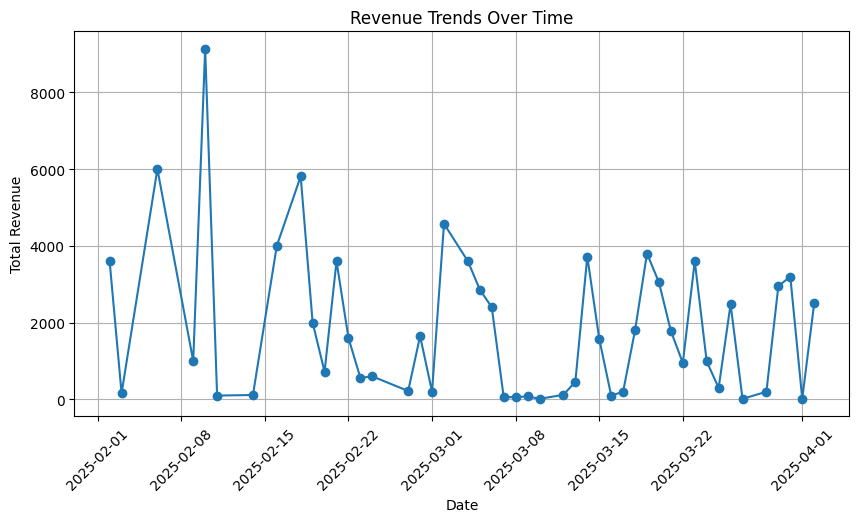

In [23]:
# --- 3. Revenue Trends Visualization ---
# Sales over time
sales_over_time = df[df['Status']=="Completed"].groupby("Date")["Total Sales"].sum()
plt.figure(figsize=(10,5))
plt.plot(sales_over_time.index, sales_over_time.values, marker='o')
plt.title("Revenue Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

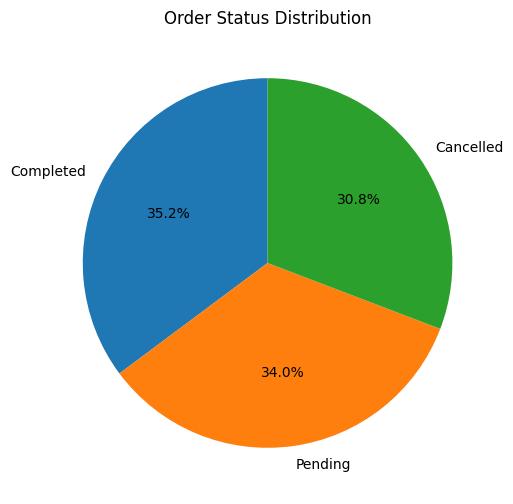

In [24]:
# Order status distribution
status_counts = df['Status'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Order Status Distribution")
plt.show()

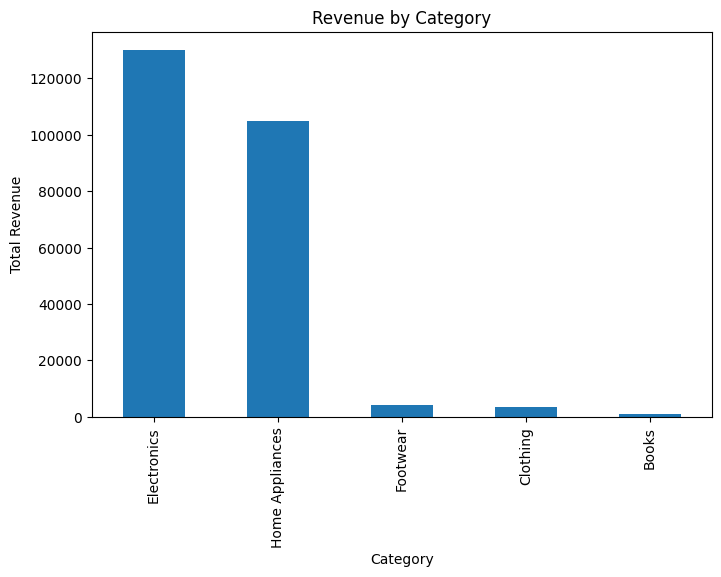

In [25]:
# Category-wise revenue
plt.figure(figsize=(8,5))
category_sales.plot(kind='bar')
plt.title("Revenue by Category")
plt.ylabel("Total Revenue")
plt.show()

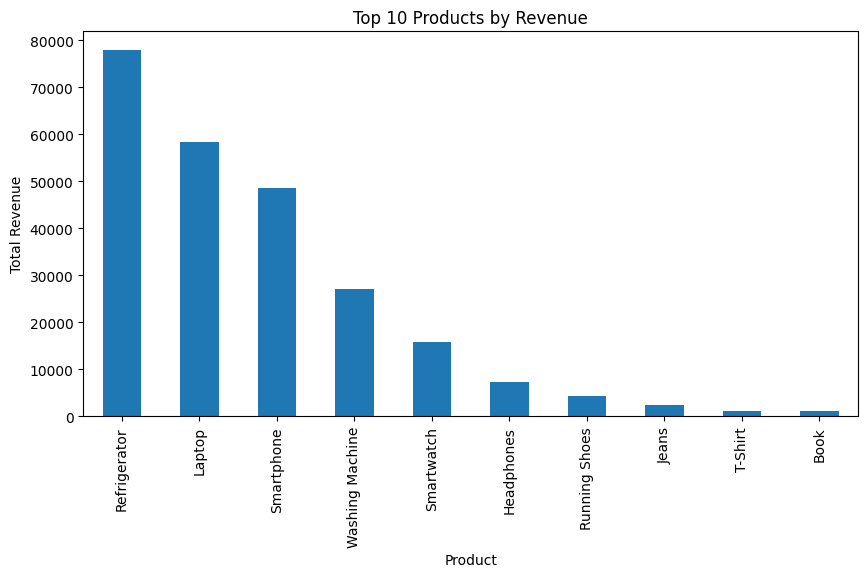

In [26]:
# Top products visualization
plt.figure(figsize=(10,5))
top_products.plot(kind='bar')
plt.title("Top 10 Products by Revenue")
plt.ylabel("Total Revenue")
plt.show()